In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 65, size=100),
    'Average_Spend': np.random.uniform(5, 50, size=100),
    'Visits_per_Week': np.random.uniform(1, 7, size=100),
    'Promotion_Interest': np.random.randint(1, 11, size=100)
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spend,Visits_per_Week,Promotion_Interest
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


In [5]:
X = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]

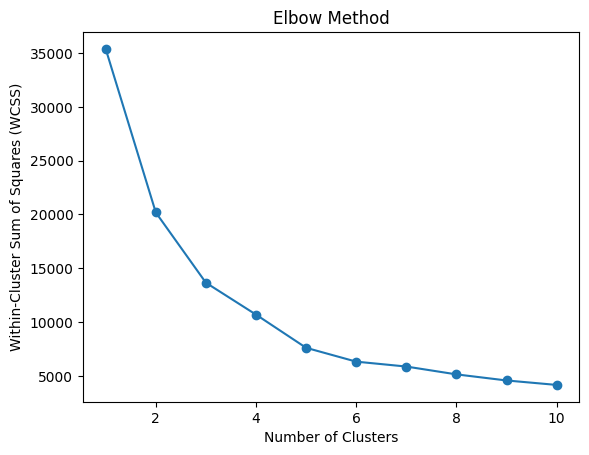

In [6]:
wcss = []
cluster_range = range(1, 11)

# Calculate WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

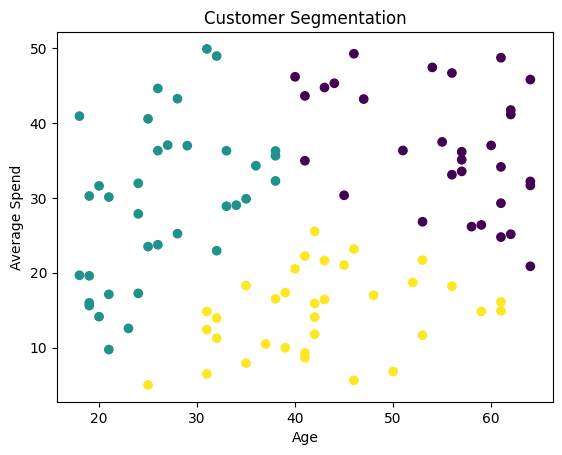

In [9]:
plt.scatter(df['Age'], df['Average_Spend'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Segmentation')
plt.show()

In [8]:
cluster_names = {0:'daily',1:'promotion',2:'weekend'}
df['Cluster_group'] = df['Cluster'].map(cluster_names)

In [10]:
print(silhouette_score(X, df['Cluster']))

0.36846369703368004


In [11]:
import pickle
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

In [13]:
pickle.load(open('kmeans.pkl', 'rb'))

KMeans(n_clusters=3, random_state=42)

In [19]:
def clustering (age,Average_spend,visits_Per_Week,promotion_interest):
    new_cust=np.array([age,Average_spend,visits_Per_Week,promotion_interest]).reshape(1,-1)
    cluster=kmeans.predict(new_cust)
    print("New Customer Belongs To :")
    if cluster==0:
        print('Daily')
    elif cluster==1:
        print('Promotion')
    else:
        print('Weekend')



In [20]:
age=41
Average_spend=30
visits_Per_Week=4
promotion_interest=7
clustering(age,Average_spend,visits_Per_Week,promotion_interest)

New Customer Belongs To :
Promotion
